<a href="https://colab.research.google.com/github/CodewSanthosh/SDC-GenAI/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.8715 - loss: 0.4293 - val_accuracy: 0.9796 - val_loss: 0.0682
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.9862 - val_loss: 0.0455
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accuracy: 0.9862 - val_loss: 0.0513
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9915 - loss: 0.0268 - val_accuracy: 0.9875 - val_loss: 0.0414
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9877 - val_loss: 0.0471
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9878 - loss: 0.0397
Test Accuracy: 0.9897


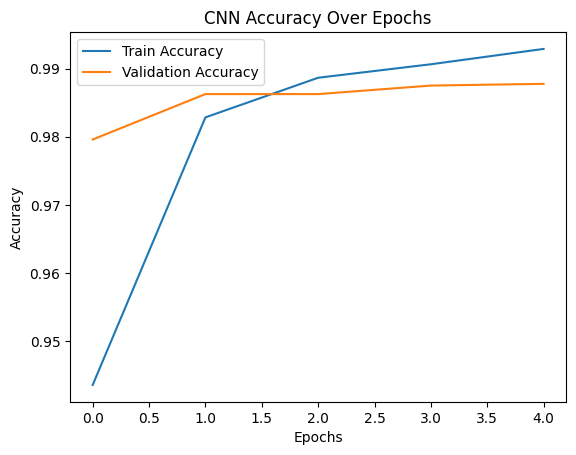

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


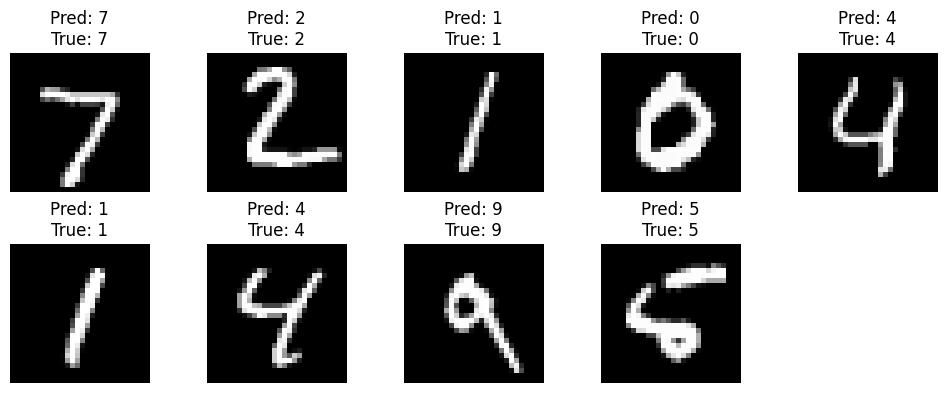

In [1]:
# CNN - Convolutional Neural Network - Google Colab Friendly

# Step 1: Install & Import Libraries
!pip install -q tensorflow

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 2: Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 3: Preprocess Data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# Step 5: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Step 7: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 8: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 9: Visualize Predictions
predictions = model.predict(X_test[:9])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:9], axis=1)

plt.figure(figsize=(10,4))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
